<h1 align='center'>Data Science Analysis</h1>
<h1 align='center'>Quiz 3</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Importing Libraries

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Question 1

In [2]:
def calculate_score(H0_exp1, H0_exp2, H0_exp1_err, H0_exp2_err):
    # Significance from p-value is also known as Z-score
    z_score = np.abs(H0_exp1 - H0_exp2) / np.sqrt(H0_exp1_err ** 2 + H0_exp2_err ** 2)
    return z_score

In [3]:
H0_exp1, H0_exp2 = 67, 71
H0_exp1_err, H0_exp2_err = 2.3, 1.3

z_score = calculate_score(H0_exp1, H0_exp2, H0_exp1_err, H0_exp2_err)

print(f"The Z-score between measurements: {z_score:.5f} sigmas.")

The Z-score between measurements: 1.51402 sigmas.


# Question 2

In [4]:
free_params = 2
confidence_interval = 0.85

# This formula is from the slides of Second and Third week on page 17
del_chi2 = chi2(free_params).ppf(confidence_interval)

print(f"The value for constant del Chi2 for an {int(confidence_interval * 100)}% confidence interval: {del_chi2:.5f}")

The value for constant del Chi2 for an 85% confidence interval: 3.79424


# Question 3

In [5]:
def calculate_del_BIC(num_data, chi2_vals, free_params):
    A_chi2, B_chi2 = chi2_vals
    A_free, B_free = free_params
    
    # Note that in this question, the reduced Chi2 value is given
    # To find out Chi2 value, we need to multiply it with number of free parameters (given in slides)
    BIC_A = (A_free * np.log(num_data)) - (2 * np.log(A_free * A_chi2))
    BIC_B = (B_free * np.log(num_data)) - (2 * np.log(B_free * B_chi2))
    return BIC_A, BIC_B, (BIC_A - BIC_B)

In [6]:
num_data_points = 10
A_red_chi2, A_free = 1.3, 6
B_red_chi2, B_free = 0.7, 8

BIC_A, BIC_B, del_BIC = calculate_del_BIC(num_data_points, [A_red_chi2, B_red_chi2], [A_free, B_free])

print(f"BIC of Model A: {BIC_A:.5f}")
print(f"BIC of Model B: {BIC_B:.5f}\n")
print(f"The difference in BIC of two models are: {del_BIC:.5f}")

BIC of Model A: 9.70726
BIC of Model B: 14.97515

The difference in BIC of two models are: -5.26788


# Question 4

[ 6  6 11 10  8 11  9  5  9 10  9 12  9 14 16 11  5  8  5  8 11  6  6 12
  6 14 10  9  7 14 10  7 14  6  7  7  2  7 11  7  9  7  9 10 16  8  7  9
 14  9  4 13  8 11 15 17  9 15 11  4 14 12 14  5  6 10 14  8  9 12  7 13
  6  8 15 13 12 14 17  7 12 10  7  8 10 12 12 10  5 10 11  9 10 10  8 11
 16  8  9 11 14 13  9  7 11 16 11 17 10  7  4 10 10 12  7  9  7  8  9 17
  5  4  6 10  8 12 11  6  6 10 13  6  4  5  6  5  4  9  5  5  7 13  9 11
 13 15  6  7  8 14 12 13 11  8 11  9  8 15  6 16 10 10 11 11 13 13 14 11
 12  9  8  6 17 15 10  5  7  6  3  8 11 10 11 11 15  8  6  5  7  8  7 13
 10  9 10 13 10 11  9  8 12 16 15  9 14 13  9  9 10 17  8 10 14  8 15  9
 12 10  8 10 17  9  7 12 12 11 16  9  4  7 11 15  8  5  9  8  8  6  5 11
 10  9 13 10 10 14 11  9 11 13 11  9 14  8 11  8  9  7 12 13 12  4 11  8
  5  8  6  7 12 13 11 12 13 18  9  5 12  3 14 15 14 12 10 12  9 10 13 12
 14 12  8 12  9  9 11 10  9  8 12  9 10  7  5 11  9 12 10  9  9  9 12  6
  8  7  7  9 14 14 14 12 17 11  8  9 12  7  6  7 15

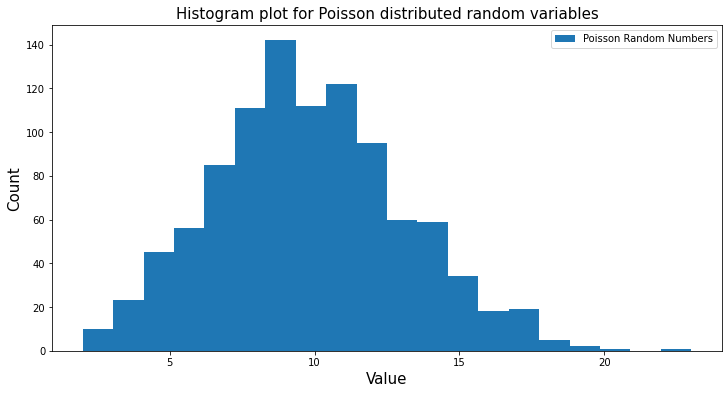

In [7]:
mean = 10
number = 1000
random_variables = np.random.poisson(mean, number)
print(random_variables)

fig = plt.figure(figsize = (12, 6))
plt.hist(random_variables, bins = 20, label = "Poisson Random Numbers")
plt.title("Histogram plot for Poisson distributed random variables", size = 15)
plt.xlabel("Value", size = 15)
plt.ylabel("Count", size = 15)
plt.legend()
plt.show()